In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from rflearn.env import GridWorld
from rflearn.algo import TabularQValue, TabularPolicy, Episode
from rflearn.algo.episode import EpisodeStep
from rflearn.algo import MCIteration

In [2]:
env = GridWorld(4, 4)
tpolicy = TabularPolicy(env.S, env.A, epsilon=0)
bpolicy = TabularPolicy(env.S, env.A, epsilon=0.2)
qvalue = TabularQValue(env.S, env.A)
agent = MCIteration(env, qvalue, bpolicy)

In [3]:
agent.fit(gamma=1, alpha=0.1)

iter = 1000
kbatch = 30
for _ in tqdm(range(iter)):
    eps = agent.get_episodes(kbatch)
    updated = agent.evaluate_policy(eps)
    agent.policy = tpolicy
    agent.improve_policy(updated)
    agent.policy = bpolicy

100%|██████████| 1000/1000 [00:19<00:00, 52.37it/s]


<AxesSubplot:>

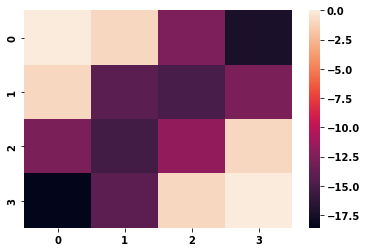

In [4]:
sns.heatmap(qvalue.get_all_values(tpolicy).reshape(env.shape))

In [9]:
ep = eps[0]

In [20]:
data = []
for step in ep:
    s0, a0, r1, s1, is_t = step
    tp = tpolicy[s0][tpolicy.get_aidx(a0)]
    bp = bpolicy[s0][bpolicy.get_aidx(a0)]
    rho = tp / bp
    data.append((tp, bp, rho))

In [28]:
tpolicy.is_trace(ep, bpolicy)

[(0.0, 0.25, 0.0),
 (0.0, 0.25, 0.0),
 (0.0, 0.25, 0.0),
 (0.0, 0.25, 0.0),
 (0.0, 0.25, 0.0),
 (0.0, 0.25, 0.0),
 (1.0, 0.25, 4.0),
 (0.0, 0.25, 0.0),
 (0.0, 0.25, 0.0),
 (1.0, 0.25, 4.0),
 (0.0, 0.25, 0.0),
 (0.0, 0.25, 0.0),
 (0.0, 0.25, 0.0),
 (0.0, 0.25, 0.0),
 (0.0, 0.25, 0.0),
 (1.0, 0.25, 4.0),
 (1.0, 0.25, 4.0),
 (0.0, 0.25, 0.0),
 (1.0, 0.25, 4.0),
 (1.0, 0.25, 4.0)]

In [27]:
data

[(0.0, 0.25, 0.0),
 (0.0, 0.25, 0.0),
 (0.0, 0.25, 0.0),
 (0.0, 0.25, 0.0),
 (0.0, 0.25, 0.0),
 (0.0, 0.25, 0.0),
 (1.0, 0.25, 4.0),
 (0.0, 0.25, 0.0),
 (0.0, 0.25, 0.0),
 (1.0, 0.25, 4.0),
 (0.0, 0.25, 0.0),
 (0.0, 0.25, 0.0),
 (0.0, 0.25, 0.0),
 (0.0, 0.25, 0.0),
 (0.0, 0.25, 0.0),
 (1.0, 0.25, 4.0),
 (1.0, 0.25, 4.0),
 (0.0, 0.25, 0.0),
 (1.0, 0.25, 4.0),
 (1.0, 0.25, 4.0)]

In [22]:
ep

Episode<n:20>
    0: EpisodeStep(s0=13, a0='left', r1=-1, s1=12, is_terminal=False)
    1: EpisodeStep(s0=12, a0='down', r1=-1, s1=12, is_terminal=False)
    2: EpisodeStep(s0=12, a0='right', r1=-1, s1=13, is_terminal=False)
    3: EpisodeStep(s0=13, a0='down', r1=-1, s1=13, is_terminal=False)
    4: EpisodeStep(s0=13, a0='left', r1=-1, s1=12, is_terminal=False)
    5: EpisodeStep(s0=12, a0='down', r1=-1, s1=12, is_terminal=False)
    6: EpisodeStep(s0=12, a0='up', r1=-1, s1=8, is_terminal=False)
    7: EpisodeStep(s0=8, a0='down', r1=-1, s1=12, is_terminal=False)
    8: EpisodeStep(s0=12, a0='left', r1=-1, s1=12, is_terminal=False)
    9: EpisodeStep(s0=12, a0='up', r1=-1, s1=8, is_terminal=False)
    10: EpisodeStep(s0=8, a0='left', r1=-1, s1=8, is_terminal=False)
    11: EpisodeStep(s0=8, a0='left', r1=-1, s1=8, is_terminal=False)
    12: EpisodeStep(s0=8, a0='down', r1=-1, s1=12, is_terminal=False)
    13: EpisodeStep(s0=12, a0='down', r1=-1, s1=12, is_terminal=False)
    14: Episo